In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
file_path = "C:\\Users\\Admin\\Desktop\\Murdoch\\guvi\\projects\\Copper\\Copper_Set.csv"
df = pd.read_csv(file_path, encoding='latin1')


In [4]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [5]:
for i in list(df.columns):
    print(f"{i}:{df[i].nunique()}")
     

id:181671
item_date:252
quantity tons:181673
customer:1169
country:17
status:9
item type:7
application:30
thickness:594
width:1386
material_ref:16563
product_ref:33
delivery date:28
selling_price:9795


In [6]:
df.dtypes
     

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [7]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [8]:
df.shape

(181673, 14)

In [9]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['item_date_1'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date_1'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01


In [10]:
df['material_ref'] = df['material_ref'].str.lstrip('0')

In [11]:
df.isnull().sum()

id                     2
item_date              1
quantity tons          1
customer               1
country               28
status                 2
item type              0
application           24
thickness              1
width                  0
material_ref       77919
product_ref            0
delivery date          1
selling_price          1
item_date_1            3
delivery date_1        3
dtype: int64

In [12]:
df.drop(columns=['id','material_ref'], inplace=True)
df
     

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [13]:
df.isnull().sum()

item_date           1
quantity tons       1
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       1
item_date_1         3
delivery date_1     3
dtype: int64

In [14]:
df1 = df.copy()

In [15]:
df1 = df1.dropna()

In [16]:
missing_values_count = df1.isnull().sum()
print(missing_values_count)
print(df1.shape)

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery date_1    0
dtype: int64
(181633, 14)


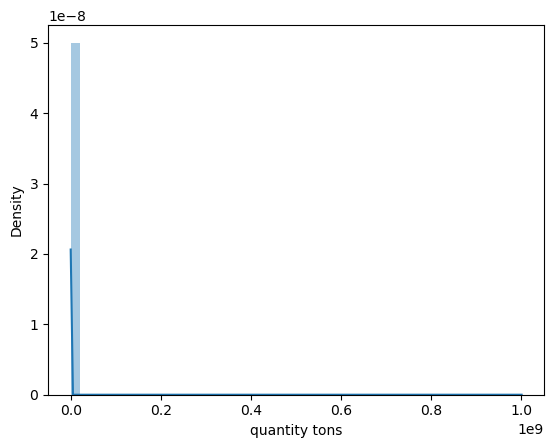

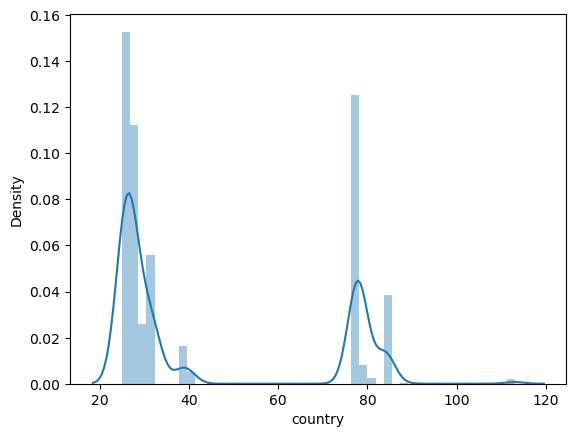

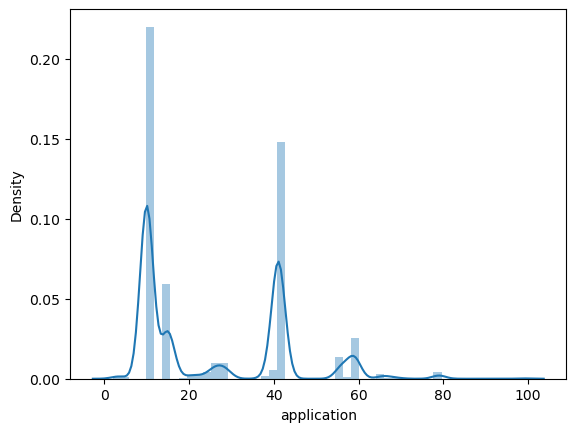

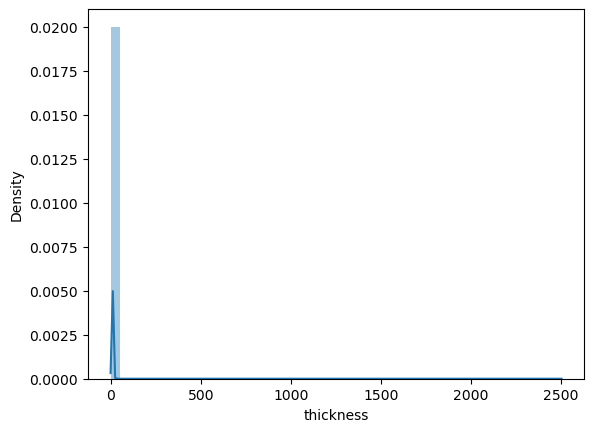

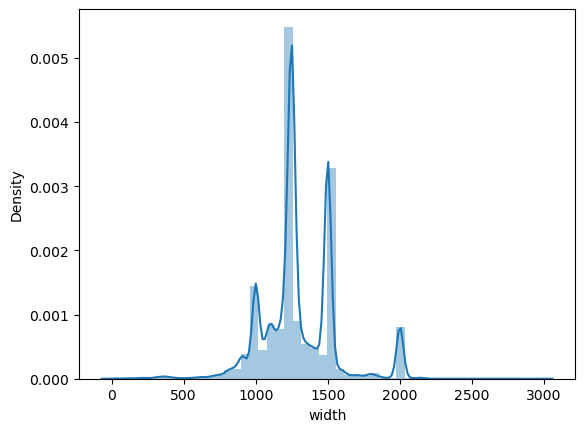

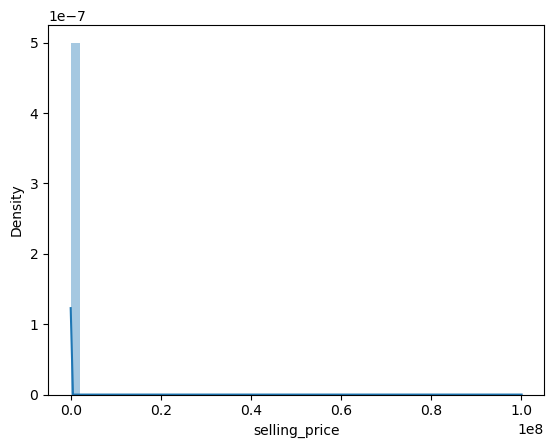

In [17]:
df1['quantity tons']   # skewed
df1['country']
df1['application']
df1['thickness']       # skewed
df1['width']           
df1['selling_price']   # skewed

import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df1['quantity tons'])
plt.show()
sns.distplot(df1['country'])
plt.show()
sns.distplot(df1['application'])
plt.show()
sns.distplot(df1['thickness'])
plt.show()
sns.distplot(df1['width'])
plt.show()
sns.distplot(df1['selling_price'])
plt.show()

In [18]:

df1.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181633.0,2.020459e+07,4.511849e+03,20200702.00,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181633.0,5.876167e+03,2.349333e+06,-2000.00,1.096819e+01,3.036258e+01,6.716145e+01,1.000000e+09
customer,181633.0,3.023251e+07,1.005621e+05,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,3.040818e+07
country,181633.0,4.489301e+01,2.440424e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181633.0,2.561607e+01,1.775393e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181633.0,2.564190e+00,6.572602e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181633.0,1.295264e+03,2.616447e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181633.0,4.740346e+08,7.175403e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181633.0,2.020733e+07,4.416718e+03,20190401.00,2.020110e+07,2.021010e+07,2.021040e+07,2.022010e+07
selling_price,181633.0,1.918355e+03,3.318313e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [19]:
df1['quantity tons'] = df1['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df1['selling_price'] = df1['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181633.0,2.020459e+07,4.511849e+03,2.020070e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181629.0,5.876307e+03,2.349359e+06,1.000000e-05,1.096898e+01,3.036408e+01,6.716228e+01,1.000000e+09
customer,181633.0,3.023251e+07,1.005621e+05,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,3.040818e+07
country,181633.0,4.489301e+01,2.440424e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181633.0,2.561607e+01,1.775393e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181633.0,2.564190e+00,6.572602e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181633.0,1.295264e+03,2.616447e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181633.0,4.740346e+08,7.175403e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181633.0,2.020733e+07,4.416718e+03,2.019040e+07,2.020110e+07,2.021010e+07,2.021040e+07,2.022010e+07
selling_price,181626.0,1.918444e+03,3.318377e+05,1.000000e-01,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [20]:
df1.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181633 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_date        181633 non-null  float64
 1   quantity tons    181629 non-null  float64
 2   customer         181633 non-null  float64
 3   country          181633 non-null  float64
 4   status           181633 non-null  object 
 5   item type        181633 non-null  object 
 6   application      181633 non-null  float64
 7   thickness        181633 non-null  float64
 8   width            181633 non-null  float64
 9   product_ref      181633 non-null  int64  
 10  delivery date    181633 non-null  float64
 11  selling_price    181626 non-null  float64
 12  item_date_1      181633 non-null  object 
 13  delivery date_1  181633 non-null  object 
dtypes: float64(9), int64(1), object(4)
memory usage: 20.8+ MB


In [22]:
df2 = df1.copy()

In [23]:
df2.head()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181633 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_date        181633 non-null  float64
 1   quantity tons    181629 non-null  float64
 2   customer         181633 non-null  float64
 3   country          181633 non-null  float64
 4   status           181633 non-null  object 
 5   item type        181633 non-null  object 
 6   application      181633 non-null  float64
 7   thickness        181633 non-null  float64
 8   width            181633 non-null  float64
 9   product_ref      181633 non-null  int64  
 10  delivery date    181633 non-null  float64
 11  selling_price    181626 non-null  float64
 12  item_date_1      181633 non-null  object 
 13  delivery date_1  181633 non-null  object 
dtypes: float64(9), int64(1), object(4)
memory usage: 20.8+ MB


In [24]:
df2.dropna(inplace=True)
len(df2)

181622

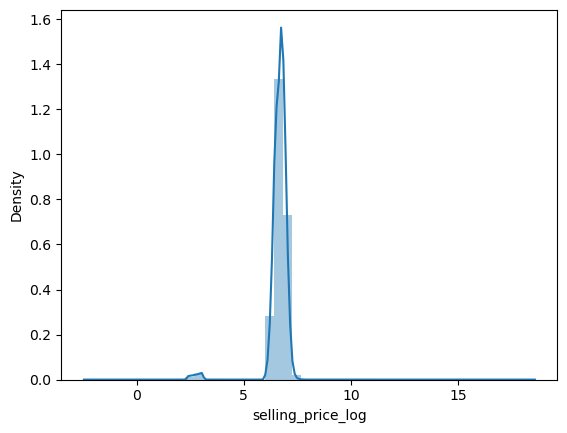

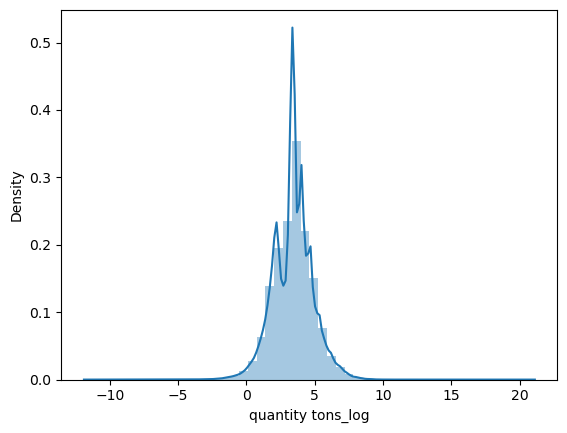

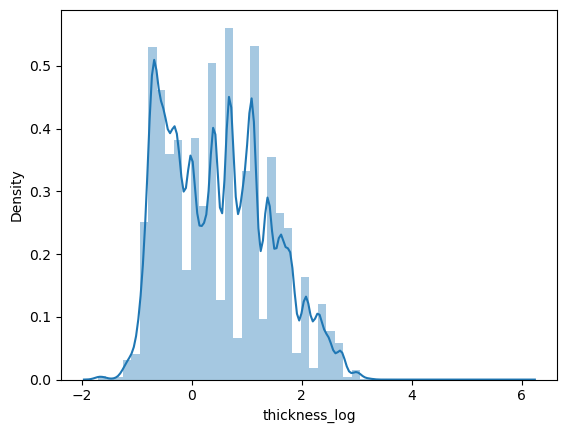

In [25]:
df2['selling_price_log'] = np.log(df2['selling_price'])
sns.distplot(df2['selling_price_log'])
plt.show()

df2['quantity tons_log'] = np.log(df2['quantity tons'])
sns.distplot(df2['quantity tons_log'])
plt.show()

df2['thickness_log'] = np.log(df2['thickness'])
sns.distplot(df2['thickness_log'])
plt.show()

In [26]:
x=df2[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()

<Axes: >

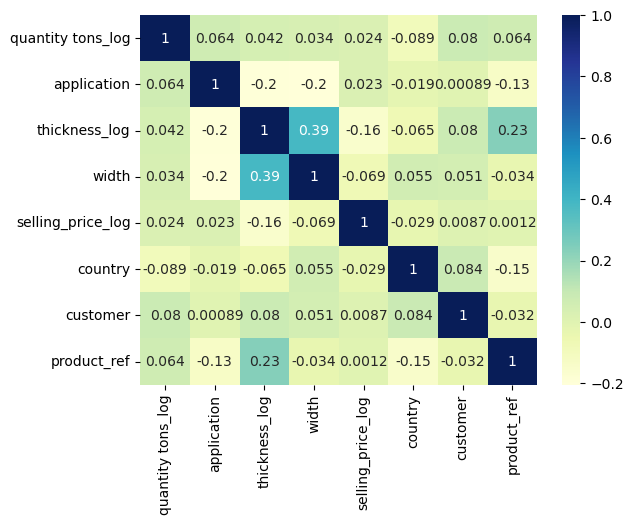

In [27]:

sns.heatmap(x, annot=True, cmap="YlGnBu")

In [52]:
columns_to_drop = ['quantity tons', 'thickness', 'selling_price']
df3 = df2.drop(columns=columns_to_drop)

In [53]:
df3

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,selling_price_log,quantity tons_log,thickness_log
0,20210401.0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,6.749931,3.991779,0.693147
1,20210401.0,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.953684,6.643822,-0.223144
2,20210401.0,30153963.0,30.0,Won,WI,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,6.468211,5.956169,-0.967584
3,20210401.0,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,6.643790,5.310301,0.832909
4,20210401.0,30211560.0,28.0,Won,W,10.0,2000.0,640665,20210301.0,2021-04-01,2021-03-01,6.357842,6.666354,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,20200702.0,30200854.0,25.0,Won,W,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-07-01,6.400257,4.670802,-0.040822
181668,20200702.0,30200854.0,25.0,Won,W,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,6.381816,4.629691,-0.040822
181669,20200702.0,30200854.0,25.0,Won,W,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,6.378426,5.337954,-0.051293
181670,20200702.0,30200854.0,25.0,Won,W,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,6.428105,1.443523,-0.342490


In [54]:
df3.dtypes



item_date            float64
customer             float64
country              float64
status                object
item type             object
application          float64
width                float64
product_ref            int64
delivery date        float64
item_date_1           object
delivery date_1       object
selling_price_log    float64
quantity tons_log    float64
thickness_log        float64
dtype: object

In [55]:
df3.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,selling_price_log,quantity tons_log,thickness_log
0,20210401.0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,6.749931,3.991779,0.693147
1,20210401.0,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.953684,6.643822,-0.223144
2,20210401.0,30153963.0,30.0,Won,WI,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,6.468211,5.956169,-0.967584
3,20210401.0,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,6.643790,5.310301,0.832909
4,20210401.0,30211560.0,28.0,Won,W,10.0,2000.0,640665,20210301.0,2021-04-01,2021-03-01,6.357842,6.666354,1.386294


In [90]:

df3['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [113]:
df3.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,selling_price_log,quantity tons_log,thickness_log
0,20210401.0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,6.749931,3.991779,0.693147
1,20210401.0,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.953684,6.643822,-0.223144
2,20210401.0,30153963.0,30.0,Won,WI,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,6.468211,5.956169,-0.967584
3,20210401.0,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,6.643790,5.310301,0.832909
4,20210401.0,30211560.0,28.0,Won,W,10.0,2000.0,640665,20210301.0,2021-04-01,2021-03-01,6.357842,6.666354,1.386294


In [92]:
df3.isnull().sum()

item_date            0
customer             0
country              0
status               0
item type            0
application          0
width                0
product_ref          0
delivery date        0
item_date_1          0
delivery date_1      0
selling_price_log    0
quantity tons_log    0
thickness_log        0
dtype: int64

In [142]:
df4 = df3.copy()

In [143]:
df4['item_date_1'] = pd.to_datetime(df4['item_date_1'])

# split the day, month, and year from 'item_date_1' column and add dataframe (This data also help us to prediction)
df4['item_date_day'] = df4['item_date_1'].dt.day
df4['item_date_month'] = df4['item_date_1'].dt.month
df4['item_date_year'] = df4['item_date_1'].dt.year
df4

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,selling_price_log,quantity tons_log,thickness_log,item_date_day,item_date_month,item_date_year
0,20210401.0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,6.749931,3.991779,0.693147,1,4,2021
1,20210401.0,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.953684,6.643822,-0.223144,1,4,2021
2,20210401.0,30153963.0,30.0,Won,WI,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,6.468211,5.956169,-0.967584,1,4,2021
3,20210401.0,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,6.643790,5.310301,0.832909,1,4,2021
4,20210401.0,30211560.0,28.0,Won,W,10.0,2000.0,640665,20210301.0,2021-04-01,2021-03-01,6.357842,6.666354,1.386294,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,20200702.0,30200854.0,25.0,Won,W,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-07-01,6.400257,4.670802,-0.040822,2,7,2020
181668,20200702.0,30200854.0,25.0,Won,W,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,6.381816,4.629691,-0.040822,2,7,2020
181669,20200702.0,30200854.0,25.0,Won,W,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,6.378426,5.337954,-0.051293,2,7,2020
181670,20200702.0,30200854.0,25.0,Won,W,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,6.428105,1.443523,-0.342490,2,7,2020


In [144]:
df4['delivery date_1'] = pd.to_datetime(df4['delivery date_1'])

# split the day, month, and year from 'item_date_1' column and add dataframe (This data also help us to prediction)
df4['delivery_date_day'] = df4['delivery date_1'].dt.day
df4['delivery_date_month'] = df4['delivery date_1'].dt.month
df4['delivery_date_year'] = df4['delivery date_1'].dt.year
df4

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,selling_price_log,quantity tons_log,thickness_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,20210401.0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,6.749931,3.991779,0.693147,1,4,2021,1,7,2021
1,20210401.0,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.953684,6.643822,-0.223144,1,4,2021,1,4,2021
2,20210401.0,30153963.0,30.0,Won,WI,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,6.468211,5.956169,-0.967584,1,4,2021,1,1,2021
3,20210401.0,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,6.643790,5.310301,0.832909,1,4,2021,1,1,2021
4,20210401.0,30211560.0,28.0,Won,W,10.0,2000.0,640665,20210301.0,2021-04-01,2021-03-01,6.357842,6.666354,1.386294,1,4,2021,1,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,20200702.0,30200854.0,25.0,Won,W,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-07-01,6.400257,4.670802,-0.040822,2,7,2020,1,7,2020
181668,20200702.0,30200854.0,25.0,Won,W,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,6.381816,4.629691,-0.040822,2,7,2020,1,7,2020
181669,20200702.0,30200854.0,25.0,Won,W,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,6.378426,5.337954,-0.051293,2,7,2020,1,7,2020
181670,20200702.0,30200854.0,25.0,Won,W,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,6.428105,1.443523,-0.342490,2,7,2020,1,7,2020


In [149]:
columns_to_drop = ['item_date', 'delivery date', 'item_date_1',"delivery date_1"]  # List of column names to drop

# Drop specified columns
df4.drop(columns=columns_to_drop, inplace=True)

In [150]:
df4

,customer,country,status,item type,application,width,product_ref,selling_price_log,quantity tons_log,thickness_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,6.749931,3.991779,0.693147,1,4,2021,1,7,2021
1,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,6.953684,6.643822,-0.223144,1,4,2021,1,4,2021
2,30153963.0,30.0,Won,WI,28.0,952.0,628377,6.468211,5.956169,-0.967584,1,4,2021,1,1,2021
3,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,6.643790,5.310301,0.832909,1,4,2021,1,1,2021
4,30211560.0,28.0,Won,W,10.0,2000.0,640665,6.357842,6.666354,1.386294,1,4,2021,1,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,30200854.0,25.0,Won,W,41.0,1240.0,164141591,6.400257,4.670802,-0.040822,2,7,2020,1,7,2020
181668,30200854.0,25.0,Won,W,41.0,1220.0,164141591,6.381816,4.629691,-0.040822,2,7,2020,1,7,2020
181669,30200854.0,25.0,Won,W,41.0,1500.0,164141591,6.378426,5.337954,-0.051293,2,7,2020,1,7,2020
181670,30200854.0,25.0,Won,W,41.0,1250.0,164141591,6.428105,1.443523,-0.342490,2,7,2020,1,7,2020


In [256]:
df_mod = df4.copy()

In [194]:
df4

,customer,country,status,item type,application,width,product_ref,selling_price_log,quantity tons_log,thickness_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,6.749931,3.991779,0.693147,1,4,2021,1,7,2021
1,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,6.953684,6.643822,-0.223144,1,4,2021,1,4,2021
2,30153963.0,30.0,Won,WI,28.0,952.0,628377,6.468211,5.956169,-0.967584,1,4,2021,1,1,2021
3,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,6.643790,5.310301,0.832909,1,4,2021,1,1,2021
4,30211560.0,28.0,Won,W,10.0,2000.0,640665,6.357842,6.666354,1.386294,1,4,2021,1,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,30200854.0,25.0,Won,W,41.0,1240.0,164141591,6.400257,4.670802,-0.040822,2,7,2020,1,7,2020
181668,30200854.0,25.0,Won,W,41.0,1220.0,164141591,6.381816,4.629691,-0.040822,2,7,2020,1,7,2020
181669,30200854.0,25.0,Won,W,41.0,1500.0,164141591,6.378426,5.337954,-0.051293,2,7,2020,1,7,2020
181670,30200854.0,25.0,Won,W,41.0,1250.0,164141591,6.428105,1.443523,-0.342490,2,7,2020,1,7,2020


# Model

In [64]:

import sklearn
sklearn.__version__

'1.3.0'

In [68]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc , accuracy_score
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [257]:
df_mod

,customer,country,status,item type,application,width,product_ref,selling_price_log,quantity tons_log,thickness_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,6.749931,3.991779,0.693147,1,4,2021,1,7,2021
1,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,6.953684,6.643822,-0.223144,1,4,2021,1,4,2021
2,30153963.0,30.0,Won,WI,28.0,952.0,628377,6.468211,5.956169,-0.967584,1,4,2021,1,1,2021
3,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,6.643790,5.310301,0.832909,1,4,2021,1,1,2021
4,30211560.0,28.0,Won,W,10.0,2000.0,640665,6.357842,6.666354,1.386294,1,4,2021,1,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,30200854.0,25.0,Won,W,41.0,1240.0,164141591,6.400257,4.670802,-0.040822,2,7,2020,1,7,2020
181668,30200854.0,25.0,Won,W,41.0,1220.0,164141591,6.381816,4.629691,-0.040822,2,7,2020,1,7,2020
181669,30200854.0,25.0,Won,W,41.0,1500.0,164141591,6.378426,5.337954,-0.051293,2,7,2020,1,7,2020
181670,30200854.0,25.0,Won,W,41.0,1250.0,164141591,6.428105,1.443523,-0.342490,2,7,2020,1,7,2020


In [258]:
df_mod['status'] = df_mod['status'].map({'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4,
                                 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
df_mod['item type'] = OrdinalEncoder().fit_transform(df_mod[['item type']])
df_mod

,customer,country,status,item type,application,width,product_ref,selling_price_log,quantity tons_log,thickness_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,6.749931,3.991779,0.693147,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.953684,6.643822,-0.223144,1,4,2021,1,4,2021
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,6.468211,5.956169,-0.967584,1,4,2021,1,1,2021
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,6.643790,5.310301,0.832909,1,4,2021,1,1,2021
4,30211560.0,28.0,1,5.0,10.0,2000.0,640665,6.357842,6.666354,1.386294,1,4,2021,1,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,30200854.0,25.0,1,5.0,41.0,1240.0,164141591,6.400257,4.670802,-0.040822,2,7,2020,1,7,2020
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,6.381816,4.629691,-0.040822,2,7,2020,1,7,2020
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,6.378426,5.337954,-0.051293,2,7,2020,1,7,2020
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,6.428105,1.443523,-0.342490,2,7,2020,1,7,2020


In [260]:

df_mod1 = df_mod.query('status==1 or status ==0')

In [261]:

df_mod1.status.value_counts(normalize=True)*100

status
1    77.111309
0    22.888691
Name: proportion, dtype: float64

In [280]:
df_mod2 = df_mod.copy()

In [201]:
#77% of Won datapoint and 22% of Lost data point..not right

In [262]:
df_mod1

,customer,country,status,item type,application,width,product_ref,selling_price_log,quantity tons_log,thickness_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,6.749931,3.991779,0.693147,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.953684,6.643822,-0.223144,1,4,2021,1,4,2021
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,6.468211,5.956169,-0.967584,1,4,2021,1,1,2021
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,6.643790,5.310301,0.832909,1,4,2021,1,1,2021
4,30211560.0,28.0,1,5.0,10.0,2000.0,640665,6.357842,6.666354,1.386294,1,4,2021,1,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,30200854.0,25.0,1,5.0,41.0,1240.0,164141591,6.400257,4.670802,-0.040822,2,7,2020,1,7,2020
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,6.381816,4.629691,-0.040822,2,7,2020,1,7,2020
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,6.378426,5.337954,-0.051293,2,7,2020,1,7,2020
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,6.428105,1.443523,-0.342490,2,7,2020,1,7,2020


In [263]:
df_mod1['status'].value_counts()

status
1    115997
0     34431
Name: count, dtype: int64

In [264]:
x = df_mod1.drop('status', axis=1)
y = df_mod1['status']

x_new, y_new = SMOTETomek().fit_resample(x,y)
     

x.shape, y.shape, x_new.shape, y_new.shape

((150428, 15), (150428,), (229468, 15), (229468,))

In [265]:
def machine_learning_classification(x_new,y_new, algorithm):

    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm'    : algorithm.__name__,
                        'accuracy_train': accuracy_train,
                        'accuracy_test' : accuracy_test}

    return accuracy_metrics

In [266]:

print(machine_learning_classification(x_new, y_new, DecisionTreeClassifier))
print(machine_learning_classification(x_new, y_new, ExtraTreesClassifier))
print(machine_learning_classification(x_new, y_new, RandomForestClassifier))
print(machine_learning_classification(x_new, y_new, AdaBoostClassifier))
print(machine_learning_classification(x_new, y_new, GradientBoostingClassifier))
print(machine_learning_classification(x_new, y_new, XGBClassifier))

{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9672506209962086}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9860766113217414}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 0.9999945526054888, 'accuracy_test': 0.9837669412123589}
{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.761556647455522, 'accuracy_test': 0.7613849304920033}
{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.8225129920359092, 'accuracy_test': 0.8217414041051118}
{'algorithm': 'XGBClassifier', 'accuracy_train': 0.952929064028675, 'accuracy_test': 0.9467032727589663}


In [269]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

param_grid = {'max_depth'        : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2']}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [270]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
accuracy_train, accuracy_test

(0.9906686132023054, 0.9748551008846472)

In [271]:

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)

print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred))

[[22869   182]
 [  955 21888]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     23051
           1       0.99      0.96      0.97     22843

    accuracy                           0.98     45894
   macro avg       0.98      0.98      0.98     45894
weighted avg       0.98      0.98      0.98     45894



In [272]:
FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)

0.9751486729301093


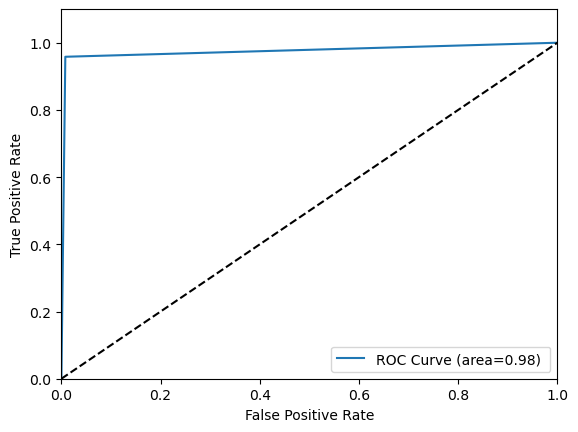

In [273]:

plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [274]:
user_data = np.array([[30223403, 78, 5, 10, 1500, 1668701718, 2.2, 0, 7.13, 1,4,2021,1,7,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Won


In [277]:
import pickle

with open('classification_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [279]:

with open('classification_model.pkl', 'rb') as f:
    model = pickle.load(f)

user_data = np.array([[30223403, 78, 5, 10, 1500, 1668701718, 2.2, 0, 7.13, 1,4,2021,1,7,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Won


In [304]:
#regression

In [311]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle


In [305]:
df_mod2.columns

Index(['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'selling_price_log', 'quantity tons_log',
       'thickness_log', 'item_date_day', 'item_date_month', 'item_date_year',
       'delivery_date_day', 'delivery_date_month', 'delivery_date_year'],
      dtype='object')

In [312]:
def machine_learning_regression(df_mod2, algorithm):

    x = df_mod2.drop(columns=['selling_price_log'], axis=1)
    y = df_mod2['selling_price_log']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}

    return accuracy_metrics

In [313]:
print(machine_learning_regression(df_mod2, DecisionTreeRegressor))
print(machine_learning_regression(df_mod2, ExtraTreesRegressor))
print(machine_learning_regression(df_mod2, RandomForestRegressor))
print(machine_learning_regression(df_mod2, AdaBoostRegressor))
print(machine_learning_regression(df_mod2, GradientBoostingRegressor))
print(machine_learning_regression(df_mod2, XGBRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 0.9292657869655996}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9557606634190601}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9908908226057339, 'R2_test': 0.9570417991633758}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.19760673688896835, 'R2_test': 0.17223680110865047}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.8743769629730179, 'R2_test': 0.8911066174958269}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9402167677330567, 'R2_test': 0.9465826307003485}


In [314]:

x = df_mod2.drop(columns=['selling_price_log'], axis=1)
y = df_mod2['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

param_grid_r = {'max_depth'      : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2', None]}

grid_search_r = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_r, cv=5, n_jobs=-1)
grid_search_r.fit(x_train, y_train)
     

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [315]:
grid_search_r.best_params_,grid_search_r.best_score_

({'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 10},
 0.9347999505370052)

In [316]:
x = df_mod2.drop(columns=['selling_price_log'], axis=1)
y = df_mod2['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test
     

(0.9855928777617378, 0.9566598240066754)

In [317]:
x = df_mod2.drop(columns=['selling_price_log'], axis=1)
y = df_mod2['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9567911426065648,
 'Mean Absolute Error': 0.030646387043674627,
 'Mean Squared Error': 0.0024589614024868238,
 'Root Mean Squared Error': 0.04958791589174548}

In [318]:
user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]])
y_pred = model.predict(user_data)
y_pred[0]

6.933994162722604

In [319]:
np.exp(y_pred[0])

1026.586153924839

In [320]:
with open('regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [322]:

with open('regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

y_pred = model.predict(np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]]))
np.exp(y_pred[0])

1026.586153924839